## Evaluating classifiers
### _(aka the Tyra Banks Test!)_

---

* **Learning objective**: 
    * Understand the main tools available to judge your model
    * **sklearn.metrics** is your friend!
* **Content to be covered**:
    * True & False /  Positives & Negatives: 
    * Accuracy
    * Precision vs recall
    * ROC and AUC
    * Confusion matrix
* **First the theory, then the applied coding**

---

### True & False /  Positives & Negatives:

| Scenario | Predicted: NO | Predicted: YES |
| --- | ----- | --- |
| **Actual: NO** | TN | FP |
| **Actual: YES** | FN | TP |

#### Scenario 1: Gold Diggers!
* We build a scanner which scans earth samples from different regions for gold. If we find it we excavate that area
* Important to consider: Excavating earth is expensive! So if we don't find gold we lose lots of money! 
* Input: 100 gold. the model says: 70 real, 30 fake. Actually, 90 real, 10 fake
* How good is our model?
* Minimise missed opportunities

#### Scenario 2: Test for Breast Cancer
* We build a tool which tests mammograms for the presence of breast cancer
* Input: 100 mammograms. The model says: 70 clear, 30 cancerous. Actually, 90 clear, 10 cancerous
* How good is our model?
* Minimise risk
* **Lets work through a practical application of scenario 2**

---

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X,y = load_breast_cancer(return_X_y=True)

In [4]:
print(X.shape, y.shape)

(569, 30) (569,)


In [8]:
X[:1]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [10]:
from sklearn.linear_model import LogisticRegression

In [14]:
m = LogisticRegression() #create a model
m.fit(X,y) #train the model

C:\Users\tomga\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
m.score(X,y) #calculating the score == accuracy score

0.9595782073813708

### Accuracy:
* The percentage of correct guesses
* A nice simple way of assessing the model
* Fails with class imbalance

---

In [13]:
from sklearn.metrics import accuracy_score #import 
ypred = m.predict(X) #generating predictive results
accuracy_score(y,ypred) #compare predictive results to actual results

0.9595782073813708

### Precision vs recall
* A trade off between exactness and totalness
* Precision = **exactness** 
    * High Precision = more relevant than irrelevant results returned (at the expense of missing some relevant ones)
    * Also called False Positive Rate
    * High when false positives are low
* Recall = **totalness**. 
    * High Recall = most of the relevant results returned, (at the expense of including bad results)
    * Also called True Positive Rate
    * High when false negatives are low 
* Remember the two scenarios! Which one suits which measure?

In [16]:
from sklearn.metrics import precision_score, recall_score

In [20]:
print(precision_score(y,ypred), recall_score(y,ypred))

0.9613259668508287 0.9747899159663865


---

### Confusion matrix
* Lets plot the confusion matrix of scenario two, and then prettify it with seaborn
* Refer above to understand the structure

In [21]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y,ypred)
conf

array([[198,  14],
       [  9, 348]], dtype=int64)

Text(33.0, 0.5, 'Actual')

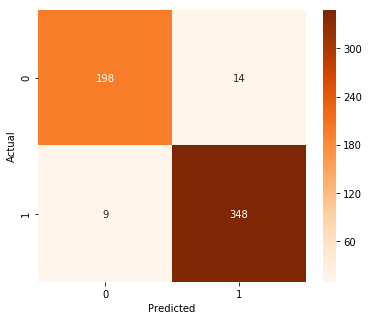

In [36]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(6,5))
sns.heatmap(conf,
            xticklabels = np.unique(y),
            yticklabels = np.unique(y),
            cmap = 'Oranges',
            annot=True,
            fmt='g',
            )
plt.xlabel('Predicted')
plt.ylabel('Actual')

---